#### Analysing and Plotting Household data Maharashtra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Parsing household data and creating a merged dataframe of level 1 and level 3

In [2]:
colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns

colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Overall monthly expenses", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns


## All India
- Shape of data reveals all entries India (rural+Urban) 
- selecting states based on code and subsetting only rural sector + inhabitated households based on survey code

In [3]:
print(dfHH1.shape)
print(dfHH3.shape)

dfHH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 27)]
dfHH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 27)]

print(dfHH1.shape)
print(dfHH3.shape)

(138798, 16)
(138798, 22)
(6245, 16)
(6245, 22)


In [4]:
HH_merge = pd.concat([dfHH1, dfHH3], axis=1)
HH_merge.shape

(6245, 38)

In [5]:
HH_merge.isna().sum()

FSU                            0
Sector                         0
State                          0
District                       0
Stratum                        0
Sub-stratum                    0
Sample HHID                    0
InformantSI no                 0
Response code                  0
Survey code                    0
Casualty code               4994
Date of Survey                22
Date of despatch             439
Time to canvass              128
NSC                            0
Multiplier                     0
FSU                            0
Sector                         0
State                          0
District                       0
Stratum                        0
Sub-stratum                    0
Sample HHID                    0
HH Size                        0
Land Own                     277
Monthly HH expenses A          3
Impute Home grown B         3815
Wages in Kind C             3470
HH durable spent D          2898
Overall monthly expenses       0
Cooking en

In [13]:
HH_inhabitated = HH_merge[HH_merge['Survey code'] == 1 ]
HH_inhabitated = HH_inhabitated[HH_inhabitated['Land Own'] <10]

In [7]:
# matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib

# Set text size
matplotlib.rcParams['font.size'] = 18

# Seaborn for pairplots
import seaborn as sns

sns.set_context('talk', font_scale=0.8);

In [14]:
HH_inhabitated['Land Own'].dropna()

102586    1.0
102587    1.0
102589    1.0
102590    1.0
102591    1.0
         ... 
108821    1.0
108827    1.0
108828    1.0
108829    1.0
108830    2.0
Name: Land Own, Length: 4768, dtype: float64

In [17]:
HH_pairplot = HH_inhabitated.loc[:,["Dwelling structure","HH Size","Land Own","Overall monthly expenses"]]

In [18]:
HH_pairplot

,Dwelling structure,HH Size,Land Own,Overall monthly expenses
102586,3,4,1.0,15000.0
102587,3,3,1.0,15500.0
102589,1,7,1.0,12800.0
102590,3,2,1.0,10100.0
102591,3,5,1.0,15000.0
...,...,...,...,...
108821,3,1,1.0,50000.0
108827,2,1,1.0,8000.0
108828,3,5,1.0,70000.0
108829,3,2,1.0,85000.0


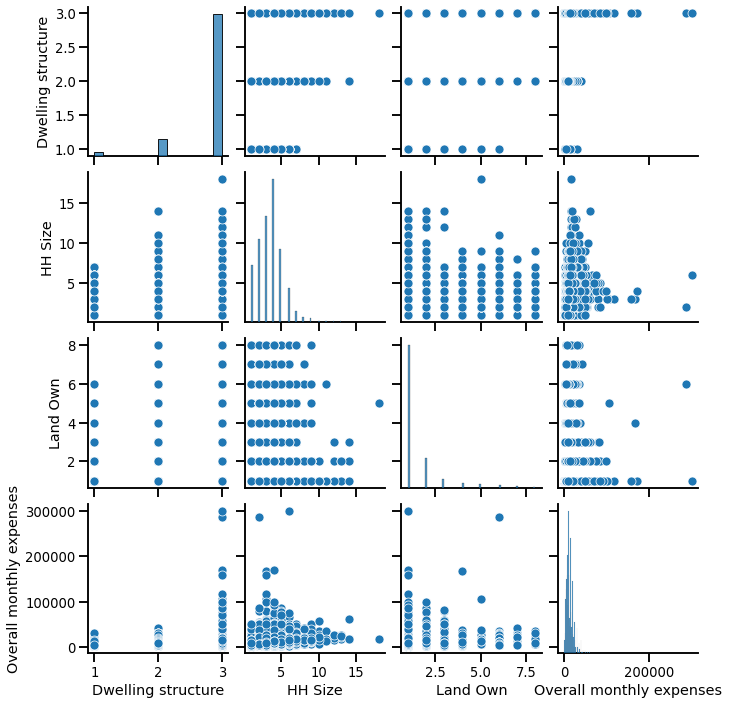

In [19]:
sns.pairplot(HH_pairplot);

In [22]:
HH_pairplot['log_monthly_expenses'] = np.log10(HH_pairplot['Overall monthly expenses'])
HH_pairplot['log_HH_Size'] = np.log10(HH_pairplot['HH Size'])

HH_pairplot = HH_pairplot.drop(columns = ['HH Size', 'Overall monthly expenses'])

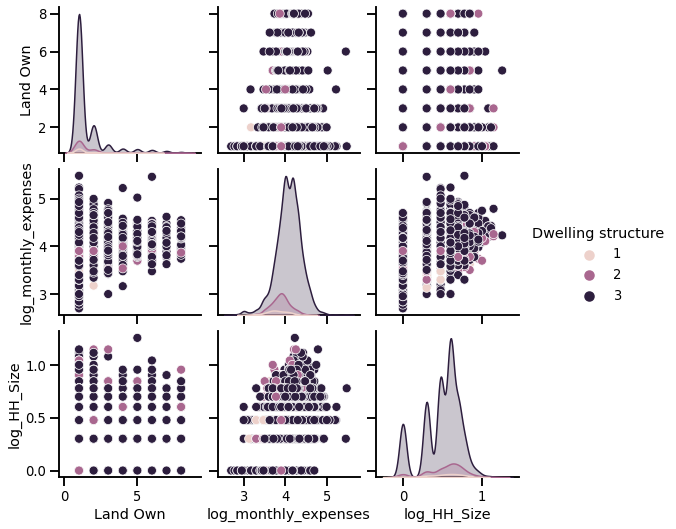

In [24]:
sns.pairplot(HH_pairplot, hue = 'Dwelling structure');

In [33]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#define upper lower bound for specific column
l,u = outlier_treatment(HH_pairplot.log_HH_Size)


#check which values are outliers
HH_pairplot[ (HH_pairplot.log_HH_Size > u) | (HH_pairplot.log_HH_Size < l) ].shape

## Drop outliers


(12, 4)

In [35]:
HH_pairplot.drop(HH_pairplot[(HH_pairplot.log_HH_Size > u) | (HH_pairplot.log_HH_Size < l)].index, inplace=True)

In [36]:
HH_pairplot

,Dwelling structure,Land Own,log_monthly_expenses,log_HH_Size
102586,3,1.0,4.176091,0.602060
102587,3,1.0,4.190332,0.477121
102589,1,1.0,4.107210,0.845098
102590,3,1.0,4.004321,0.301030
102591,3,1.0,4.176091,0.698970
...,...,...,...,...
108821,3,1.0,4.698970,0.000000
108827,2,1.0,3.903090,0.000000
108828,3,1.0,4.845098,0.698970
108829,3,1.0,4.929419,0.301030


In [ ]:
l,u = outlier_treatment(HH_pairplot.log_HH_Size)


#check which values are outliers
HH_pairplot[ (HH_pairplot.log_HH_Size > u) | (HH_pairplot.log_HH_Size < l) ]

## Drop outliers
HH_pairplot.drop([ (HH_pairplot.log_HH_Size > u) | (HH_pairplot.log_HH_Size < l) ].index , inplace=True)